In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('w0420.csv')
df

,Unnamed: 0,start_station_id,end_station_id,member_casual,duration,weekday,Month
0,0,86,152.0,member,1609.0,6,4
1,1,503,499.0,member,489.0,4,4
2,2,142,255.0,member,863.0,2,4
3,3,216,657.0,member,732.0,1,4
4,4,125,323.0,casual,3175.0,5,4
...,...,...,...,...,...,...,...
84771,84771,140,140.0,member,775.0,3,4
84772,84772,322,351.0,casual,1149.0,3,4
84773,84773,236,182.0,casual,6790.0,4,4
84774,84774,310,310.0,casual,2551.0,3,4


This is the cleaned data that we have prepared in our required format. Operations that have been done are:-

1) Converted timestamped datatime data to numeric seconds column for duration, and numeric week and month column.

2) Deleted station names for easier analysis of numeric data. We can always map the codes to the individual station names later.

3) Checked for null values, there were 99 null values in the end_station_name. So we have already deleted it.

In [3]:
#seperating annual members to extract insights from them
df = df.loc[(df['member_casual'] == 'member')]
df

,Unnamed: 0,start_station_id,end_station_id,member_casual,duration,weekday,Month
0,0,86,152.0,member,1609.0,6,4
1,1,503,499.0,member,489.0,4,4
2,2,142,255.0,member,863.0,2,4
3,3,216,657.0,member,732.0,1,4
5,5,173,35.0,member,324.0,3,4
...,...,...,...,...,...,...,...
84767,84767,126,106.0,member,482.0,6,4
84768,84768,268,141.0,member,2129.0,6,4
84769,84769,268,268.0,member,8.0,6,4
84770,84770,106,268.0,member,425.0,6,4


Now we will aggregate the data according to duration column, and visualize it in different forms like by weekday, by start_station_id and by end_station_id.

In [20]:
p1 = pd.pivot_table(df, values='duration', index='start_station_id', columns=None, aggfunc='sum', fill_value=None, margins=False, dropna=True, margins_name='All', observed=False) 
p1 = p1.sort_values(ascending = False, by = 'duration')
p1.describe()

,duration
start_station_id,
194,3643342.0
642,3252788.0
17,2322205.0
138,753011.0
282,672609.0
...,...
602,135945.0
213,135177.0
48,133361.0


lets convert the aggregated ride durations to hours for better readability

We can see at a glance that the busiest three stations started the journeys which account for the lion's share of the trip duration. Let's check it out in a pie chart.

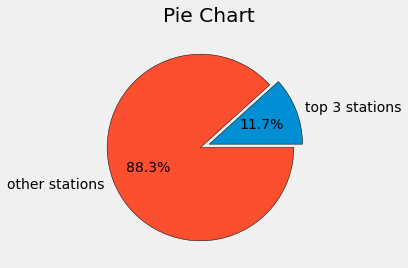

In [239]:
top_3 = p1.iloc[0:3].sum()
top_3
rest_all = p1.iloc[3:].sum()
rest_all
top_3 = top_3.append(rest_all)
top_3

plt.style.use('fivethirtyeight')
slices = top_3
labels = ['top 3 stations','other stations']
explode = [0,0.1]
colors = ['#008fd5','#fc4f30']
plt.pie(slices, shadow=False, startangle=0, autopct='%1.1f%%', labels = labels, colors = colors, wedgeprops = {'edgecolor':'black'}, explode = explode)
plt.title('Pie Chart')
#plt.tight_layout()
plt.show;

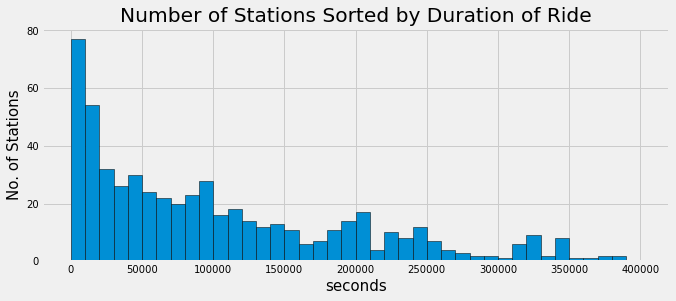

In [292]:
p8 = p1

plt.figure(figsize = (10,4))
binlist =  range(0,400001,10000)
plt.hist(p7, bins = binlist, edgecolor = 'black');
plt.xlabel('seconds', fontsize = 15)
plt.ylabel('No. of Stations', fontsize = 15)
plt.title('Number of Stations Sorted by Duration of Ride')
plt.xticks(fontsize = 10);
plt.yticks(fontsize = 10);